In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/thoi_trang.csv")

In [3]:
df.shape

(9764, 17)

In [4]:
df.head(10)

,Unnamed: 0,Product Name,Price,Brand,Categories,Product Sold,Stock,Rating,5 Start,4 Start,3 Start,2 Start,1 Start,Total Rating,No of Comments,Image and Video,Parent Category
0,0,Porozi Áo sweater dệt kim tay dài cổ tròn thời...,139000.0,porozi,Thời Trang Nữ/Áo len & Cardigan,931,142230,4.7,290,10,15,4,11,330,166,143,Thời Trang Nữ
1,1,FREESHIP- Áo len cổ tròn màu xanh đính cúc pho...,152000.0,porozi,Thời Trang Nữ/Áo len & Cardigan,241,17,4.9,56,5,0,0,0,61,45,39,Thời Trang Nữ
2,2,Áo len cho bố nam trung niên loại 1 đẹp dày dặ...,100000.0,porozi,"Thời Trang Nam/Áo Hoodie, Áo Len & Áo Nỉ/Áo Len",176,280,4.6,37,4,4,0,2,47,25,11,Thời Trang Nam
3,3,"Áo Len Nam Cổ Tròn Trơn SUKIYA Nhiều Màu, Đủ S...",164250.0,SUKIYA JAPAN,"Thời Trang Nam/Áo Hoodie, Áo Len & Áo Nỉ/Áo Len",7800,83902,4.9,2300,102,41,10,22,2500,1300,1000,Thời Trang Nam
4,4,Áo khoác cardigan len lửng tay dài nhiều màu,215000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,556,11,4.9,135,7,3,0,2,147,86,75,Thời Trang Nữ
5,5,Áo len oversize form dáng rộng dệt kim dài tay...,165000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,716,0,4.9,223,11,8,0,0,242,177,154,Thời Trang Nữ
6,6,ÁO KHOÁC CARDIGAN LEN NỮ QUẢNG CHÂU HỌA TIẾT H...,169000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,21900,142230,4.9,3800,113,47,16,41,4100,1600,1400,Thời Trang Nữ
7,7,[SẴN HÀNG] Áo len Noel giáng sinh cực nhiều mẫ...,259000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,410,421,4.8,68,7,3,1,0,79,51,32,Thời Trang Nữ
8,8,"Áo len lông thỏ cao cấp siêu mềm mịn , ao len ...",230000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo/Khác,140,690,5.0,39,2,0,0,0,41,24,20,Thời Trang Nữ
9,9,Áo len nữ màu trắng đen nâu phom xinh thời tra...,205000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,402,157,4.9,111,4,1,0,0,116,77,56,Thời Trang Nữ


In [5]:
X = df[["No of Comments", "Image and Video", "Product Sold"]]
y = df[["Rating"]]

In [6]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_score_lr = cross_val_score(reg, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(cv_score_lr.mean())

-1.825428017111245


In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
d_tree = DecisionTreeRegressor()
cv_score_dt = cross_val_score(d_tree, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(cv_score_dt.mean())

-0.5899821907815015


In [9]:
from xgboost import XGBRegressor 
xg_boost = XGBRegressor()
cv_score_xb = cross_val_score(xg_boost, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(cv_score_xb.mean())

-0.540992564047119


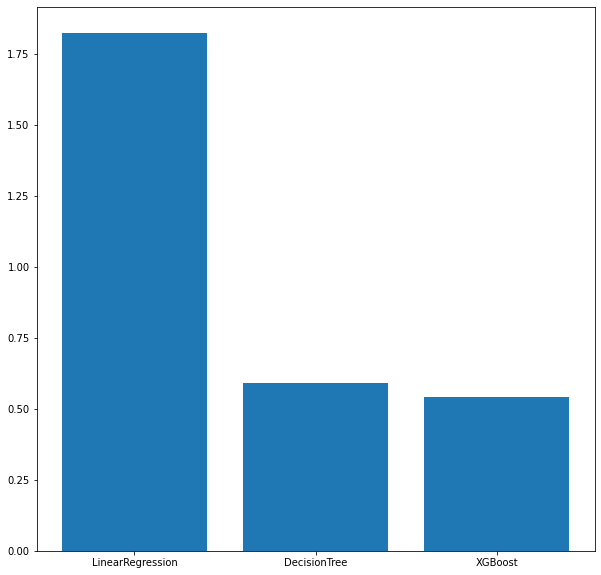

In [10]:
import matplotlib.pyplot as plt
data = [-cv_score_lr.mean(), -cv_score_dt.mean(), -cv_score_xb.mean()]
labels = ["LinearRegression", "DecisionTree", "XGBoost"]
plt.figure(figsize=(10, 10))
plt.bar(labels, data)
plt.show()